## Constraints on the mixing versus  $R = m_\phi/m_4$

https://github.com/mhostert/solar-neutrino-visible-decays

## Import modules

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import numpy as np
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from scipy.stats import chi2
import importlib
import vegas
import gvar as gv

from source import *
from source import flavour_transitions as osc
from source.plot_tools import *


## Pick points to sample integrand

In [82]:
##########
# integration evaluations
rates.NEVALwarmup = 1e3
rates.NEVAL = 1e5

## Flux and Decay Parameters

The mixings will be used to rescale the number of events, so pick anything sensible

In [83]:
###########
# NUMU FLUX
fluxfile = "fluxes/b8spectrum.txt"
flux = fluxes.get_neutrino_flux(fluxfile)

###########
# DECAY MODEL PARAMETERS
params = model.decay_model_params(const.SCALAR)
params.gx = 1.0
params.Ue4 = np.sqrt(0.01)
params.Umu4 = np.sqrt(0.000)
params.Utau4 = np.sqrt(0)
params.UD4 = np.sqrt(1.0-params.Ue4*params.Ue4-params.Umu4*params.Umu4)
params.m4 = 300e-9 # GeV
params.mBOSON = 0.1*params.m4 # GeV

###########
# EXPERIMENTS
KAM21 = exps.kamland21_data()
KAM = exps.kamland_data()
BOR = exps.borexino_data()
SK = exps.superk_data()


# Compute rates for benchmark point at the three experiments

This can be an expensive computation, depending on the desired precision -- we care about tails.

In [84]:
UE4SQR, RATIOS, LK21 = stats.get_likelihood_in_ratio_of_masses(KAM21, params, fluxfile, endpoint=18.31)
UE4SQR, RATIOS, LK = stats.get_likelihood_in_ratio_of_masses(KAM, params, fluxfile, endpoint=16.3)
UE4SQR, RATIOS, LB = stats.get_likelihood_in_ratio_of_masses(BOR, params, fluxfile, endpoint=16.3)
UE4SQR, RATIOS, LS = stats.get_likelihood_in_ratio_of_masses(SK, params, fluxfile, endpoint=16.3)

Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
(Lmin, dof) =  1.2321386487235222 3


# Plot resulting limits

<ipython-input-110-f55fc10c04f3>:18: UserWarning: The following kwargs were not used by contour: 'ls', 'label'
  c2=ax.contour(X,Y,LS, [chi2.ppf(0.99, 2)], linestyles=['--'],colors=['dodgerblue'],linewidths=[1.0], ls='--',label=r'SuperK-IV')
<ipython-input-110-f55fc10c04f3>:19: UserWarning: The following kwargs were not used by contour: 'label'
  c3=ax.contour(X,Y,LB, [chi2.ppf(0.99, 12)], linestyles=['--'],colors=['indigo'],linewidths=[1.0],label=r'Borexino')
<ipython-input-110-f55fc10c04f3>:20: UserWarning: The following kwargs were not used by contour: 'label'
  c1=ax.contour(X,Y,LK, [chi2.ppf(0.99, 6)], linestyles=['--'],colors=['forestgreen'],linewidths=[1.0],label=r'KamLAND 2011')
<ipython-input-110-f55fc10c04f3>:21: UserWarning: The following kwargs were not used by contour: 'label'
  c4=ax.contour(X,Y,LK21, [chi2.ppf(0.99, 3)], linestyles=['-'],colors=['magenta'],linewidths=[1.0],label=r'KamLAND 2021')
<ipython-input-110-f55fc10c04f3>:56: UserWarning: Matplotlib is currently us

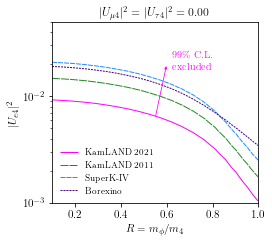

In [110]:
################################################################
# PLOTTING THE LIMITS
################################################################
fsize=11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
matplotlib.rcParams['hatch.linewidth'] = 0.1  # previous pdf hatch linewidth
rcParams.update(rcparams)
axes_form  = [0.185,0.15,0.775,0.76]
fig = plt.figure()
ax = fig.add_axes(axes_form)
matplotlib.rcParams['hatch.linewidth'] = 1  # previous pdf hatch linewidth

X,Y = np.meshgrid(RATIOS,UE4SQR)

c2=ax.contour(X,Y,LS, [chi2.ppf(0.99, 2)], linestyles=['--'],colors=['dodgerblue'],linewidths=[1.0], ls='--',label=r'SuperK-IV')
c3=ax.contour(X,Y,LB, [chi2.ppf(0.99, 12)], linestyles=['--'],colors=['indigo'],linewidths=[1.0],label=r'Borexino')
c1=ax.contour(X,Y,LK, [chi2.ppf(0.99, 6)], linestyles=['--'],colors=['forestgreen'],linewidths=[1.0],label=r'KamLAND 2011')
c4=ax.contour(X,Y,LK21, [chi2.ppf(0.99, 3)], linestyles=['-'],colors=['magenta'],linewidths=[1.0],label=r'KamLAND 2021')
c2.collections[0].set_dashes([(0, (5.0, 1.0))])
c3.collections[0].set_dashes([(0, (2.0, 1.0))])
c1.collections[0].set_dashes([(0, (8.0, 1.0))])
h1,_ = c1.legend_elements()
h2,_ = c2.legend_elements()
h3,_ = c3.legend_elements()
h4,_ = c4.legend_elements()
ax.legend([h4[0], h1[0], h2[0],h3[0]], ['KamLAND 2021', 'KamLAND 2011', 'SuperK-IV','Borexino',],
          loc='lower left', frameon=False,fontsize=9)

# ax.set_xscale('log')
ax.set_yscale('log')
##############
# STYLE
if params.model == const.VECTOR:
    boson_string = r'$m_{Z^\prime}$'
    boson_file = 'vector'
elif params.model == const.SCALAR:
    boson_string = r'$m_\phi$'
    boson_file = 'scalar'

ax.set_title(fr'$|U_{{\mu 4}}|^2 = |U_{{\tau 4}}|^2 = {params.Umu4**2:.2f}$')

ax.annotate(r'\noindent 99\% C.L. \\\noindent excluded', 
            fontsize=0.9*fsize, xy=(0.7,0.05), xytext=(0.58,0.8),xycoords='axes fraction', color='magenta')
ax.annotate(r'', fontsize=fsize, xy=(0.6,0.02), xytext=(0.55,0.0063), xycoords='data' ,zorder=1000, color='magenta',
arrowprops=dict(arrowstyle="-|>", mutation_scale=5, color='magenta', lw = 0.8))
# plt.scatter(X,Y)
ax.set_xlim(0.1,1)
ax.set_ylim(1e-3,0.05)
ax.set_xlabel(r'$R = m_\phi/m_4$')
ax.set_ylabel(r'$|U_{e 4}|^2$')
fig.savefig(f'plots/limits_ratio_{params.Umu4:.2g}.pdf')
fig.savefig(f'plots/limits_ratio_{params.Umu4:.2g}.png')
fig.show()


## Umu4 = 0.01

In [112]:
###########
# NUMU FLUX
fluxfile = "fluxes/b8spectrum.txt"
flux = fluxes.get_neutrino_flux(fluxfile)

###########
# DECAY MODEL PARAMETERS
params = model.decay_model_params(const.SCALAR)
params.gx = 1.0
params.Ue4 = np.sqrt(0.01)
params.Umu4 = np.sqrt(0.01)
params.Utau4 = np.sqrt(0)
params.UD4 = np.sqrt(1.0-params.Ue4*params.Ue4-params.Umu4*params.Umu4)
params.m4 = 300e-9 # GeV
params.mBOSON = 0.1*params.m4 # GeV

###########
# EXPERIMENTS
KAM21 = exps.kamland21_data()
KAM = exps.kamland_data()
BOR = exps.borexino_data()
SK = exps.superk_data()


In [113]:
UE4SQR_v2, RATIOS_v2, LK21_v2 = stats.get_likelihood_in_ratio_of_masses(KAM21, params, fluxfile, endpoint=18.31)
UE4SQR_v2, RATIOS_v2, LK_v2 = stats.get_likelihood_in_ratio_of_masses(KAM, params, fluxfile, endpoint=16.3)
UE4SQR_v2, RATIOS_v2, LB_v2 = stats.get_likelihood_in_ratio_of_masses(BOR, params, fluxfile, endpoint=16.3)
UE4SQR_v2, RATIOS_v2, LS_v2 = stats.get_likelihood_in_ratio_of_masses(SK, params, fluxfile, endpoint=16.3)

Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
Filling the bins in kamland21
(Lmin, dof) =  1.2321386487235222 3
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland
Filling the bins in kamland


<ipython-input-130-69d85192dd3e>:18: UserWarning: The following kwargs were not used by contour: 'ls', 'label'
  c2=ax.contour(X,Y,LS_v2, [chi2.ppf(0.99, 2)], linestyles=['--'],colors=['dodgerblue'],linewidths=[1.0], ls='--',label=r'SuperK-IV')
<ipython-input-130-69d85192dd3e>:19: UserWarning: The following kwargs were not used by contour: 'label'
  c3=ax.contour(X,Y,LB_v2, [chi2.ppf(0.99, 12)], linestyles=['--'],colors=['indigo'],linewidths=[1.0],label=r'Borexino')
<ipython-input-130-69d85192dd3e>:20: UserWarning: The following kwargs were not used by contour: 'label'
  c1=ax.contour(X,Y,LK_v2, [chi2.ppf(0.99, 6)], linestyles=['--'],colors=['forestgreen'],linewidths=[1.0],label=r'KamLAND 2011')
<ipython-input-130-69d85192dd3e>:21: UserWarning: The following kwargs were not used by contour: 'label'
  c4=ax.contour(X,Y,LK21_v2, [chi2.ppf(0.99, 3)], linestyles=['-'],colors=['magenta'],linewidths=[1.0],label=r'KamLAND 2021')
<ipython-input-130-69d85192dd3e>:57: UserWarning: Matplotlib is 

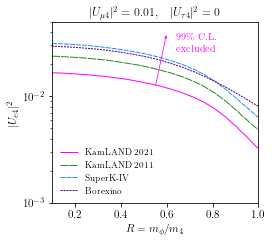

In [130]:
################################################################
# PLOTTING THE LIMITS
################################################################
fsize=11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
matplotlib.rcParams['hatch.linewidth'] = 0.1  # previous pdf hatch linewidth
rcParams.update(rcparams)
axes_form  = [0.185,0.15,0.775,0.76]
fig = plt.figure()
ax = fig.add_axes(axes_form)
matplotlib.rcParams['hatch.linewidth'] = 1  # previous pdf hatch linewidth

X,Y = np.meshgrid(RATIOS_v2,UE4SQR_v2)

c2=ax.contour(X,Y,LS_v2, [chi2.ppf(0.99, 2)], linestyles=['--'],colors=['dodgerblue'],linewidths=[1.0], ls='--',label=r'SuperK-IV')
c3=ax.contour(X,Y,LB_v2, [chi2.ppf(0.99, 12)], linestyles=['--'],colors=['indigo'],linewidths=[1.0],label=r'Borexino')
c1=ax.contour(X,Y,LK_v2, [chi2.ppf(0.99, 6)], linestyles=['--'],colors=['forestgreen'],linewidths=[1.0],label=r'KamLAND 2011')
c4=ax.contour(X,Y,LK21_v2, [chi2.ppf(0.99, 3)], linestyles=['-'],colors=['magenta'],linewidths=[1.0],label=r'KamLAND 2021')
c2.collections[0].set_dashes([(0, (5.0, 1.0))])
c3.collections[0].set_dashes([(0, (2.0, 1.0))])
c1.collections[0].set_dashes([(0, (8.0, 1.0))])
h1,_ = c1.legend_elements()
h2,_ = c2.legend_elements()
h3,_ = c3.legend_elements()
h4,_ = c4.legend_elements()
ax.legend([h4[0], h1[0], h2[0],h3[0]], ['KamLAND 2021', 'KamLAND 2011', 'SuperK-IV','Borexino',],
          loc='lower left', frameon=False,fontsize=9)

# ax.set_xscale('log')
ax.set_yscale('log')
##############
# STYLE
if params.model == const.VECTOR:
    boson_string = r'$m_{Z^\prime}$'
    boson_file = 'vector'
elif params.model == const.SCALAR:
    boson_string = r'$m_\phi$'
    boson_file = 'scalar'

ax.set_title(fr'$|U_{{\mu 4}}|^2 = {params.Umu4**2:.2f}$,\,\,\,\,   $|U_{{\tau 4}}|^2 = 0 $')

ax.annotate(r'\noindent 99\% C.L. \\\noindent excluded', 
            fontsize=0.9*fsize, xy=(0.7,0.1), xytext=(0.6,0.9),xycoords='axes fraction', color='magenta')
rescale=1.95
ax.annotate(r'', fontsize=fsize, xy=(0.6,0.02*rescale), xytext=(0.55,0.0063*rescale), xycoords='data' ,zorder=1000, color='magenta',
arrowprops=dict(arrowstyle="-|>", mutation_scale=5, color='magenta', lw = 0.8))
# plt.scatter(X,Y)
ax.set_xlim(0.1,1)
ax.set_ylim(1e-3,0.05)
ax.set_xlabel(r'$R = m_\phi/m_4$')
ax.set_ylabel(r'$|U_{e 4}|^2$')
fig.savefig(f'plots/limits_ratio_{params.Umu4:.2g}.pdf')
fig.savefig(f'plots/limits_ratio_{params.Umu4:.2g}.png')
fig.show()